In [40]:
#loading the imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Loading the DataSet

In [43]:
df = pd.read_csv('data/Titanic-Dataset.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [45]:
#Exploring the dataset and analyzing it

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
#Filling and Handling the missing values

In [54]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #Fill Age with median

In [55]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #Fill Embarked with mode

In [56]:
df = df.drop(columns=['Cabin']) #Drop cabin column due to high nulls

In [14]:
df.isnull().sum() #re-check

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
#Encoded Categorical features(Sex, Embarked)

In [58]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [59]:
# Normalized Numerical Features (Age, Fare)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [60]:
#Visualize and Remove Outliers (Visualizing using Boxplot)

In [20]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Fare'>

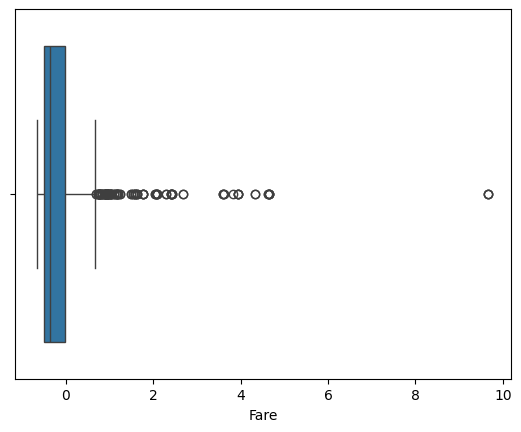

In [21]:
sns.boxplot(x=df['Fare'])

Text(0.5, 1.0, 'Fare Boxplot')

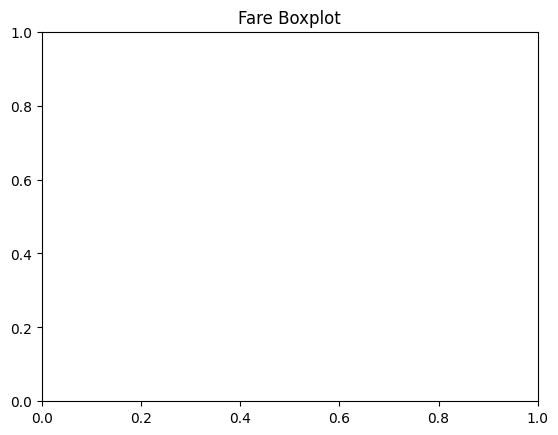

In [22]:
plt.title('Fare Boxplot')

In [24]:
plt.savefig('images/boxplot_fare.png')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.show()

In [ ]:
#(Removing Outliers using IQR (Interquartille Range))

In [26]:
Q1 = df['Fare'].quantile(0.25)

In [27]:
Q3 = df['Fare'].quantile(0.75)

In [28]:
IQR = Q3 - Q1

In [29]:
df = df[(df['Fare'] >= Q1 -1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

In [ ]:
#Exporting the cleaned_dataset

In [30]:
df.to_csv('data/Titanic_Cleaned.csv', index=False)